- evaluate & sample
    - $p(x)$ is difficult to sample from.
    - We can evaluate $p(x)$.
    - $q(x)$ is easy to evaluate and sample from.
- references
    -  https://medium.com/@amir_masoud/a-simple-tutorial-on-sampling-importance-and-monte-carlo-with-python-codes-8ce809b91465

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def f_x(x):
    return 1/(1 + np.exp(-x))

In [3]:
def distribution(mu=0, sigma=1):
    # return probability given a value
    distribution = stats.norm(mu, sigma)
    return distribution

In [4]:
n = 1000
p_mu = 3.5
p_sigma = 1
q_mu = 3
q_sigma = 1
p_x = distribution(p_mu, p_sigma)
q_x = distribution(q_mu, q_sigma)

/tmp/ipykernel_10899/4191430439.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([np.random.normal(p_mu, p_sigma) for _ in range(3000)], label="distribution $p(x)$")
/tmp/ipykernel_10899/4191430439.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([np.random.normal(q_mu, q_sigma) for _ in r

<Axes: ylabel='Density'>

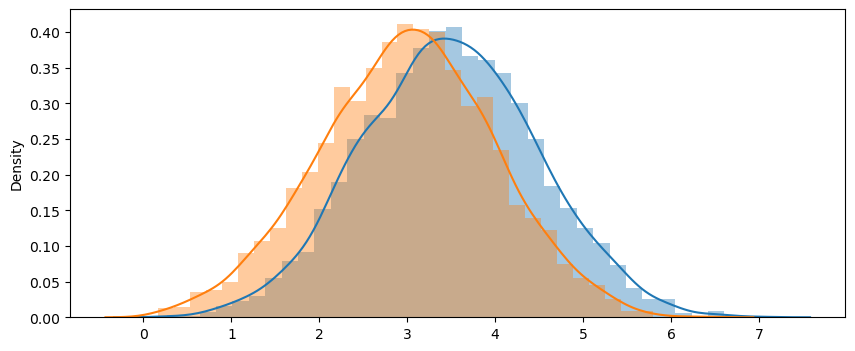

In [6]:
plt.figure(figsize=[10, 4])
sns.distplot([np.random.normal(p_mu, p_sigma) for _ in range(3000)], label="distribution $p(x)$")
sns.distplot([np.random.normal(q_mu, q_sigma) for _ in range(3000)], label="distribution $q(x)$")

In [7]:
# value
s = 0
for i in range(n):
    # draw a sample
    x_i = np.random.normal(p_mu, p_sigma)
    s += f_x(x_i)
print("simulate value", s / n)

simulate value 0.9549152141704937


In [8]:
# calculate value sampling from a different distribution
value_list = []
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(q_mu, q_sigma)
    value = f_x(x_i) * (p_x.pdf(x_i) / q_x.pdf(x_i))
    value_list.append(value)

In [9]:
print("average {} variance {}".format(np.mean(value_list), np.var(value_list)))

average 0.9502806461397122 variance 0.36348771820129505


In [10]:
# pre-setting different q(x)
n = 5000
mu_target = 3.5
sigma_target = 1
mu_appro = 1
sigma_appro = 1
p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)

/tmp/ipykernel_10899/4105117891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
/tmp/ipykernel_10899/4105117891.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([np.random.normal(mu_appro, sigma

average 1.1705296227417246 variance 234.83673806477609


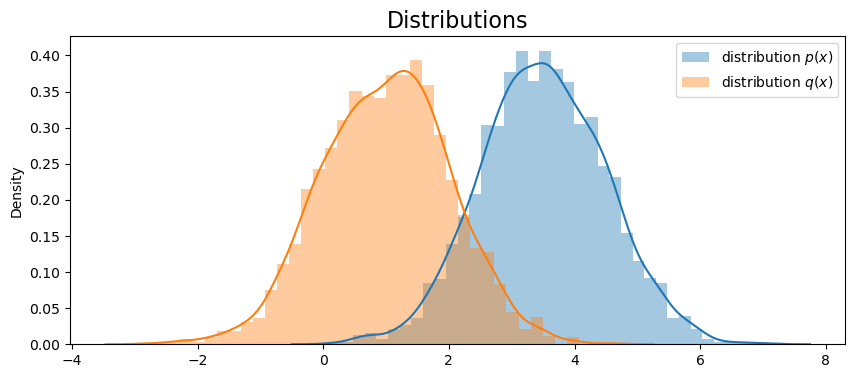

In [11]:
plt.figure(figsize=[10, 4])
sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
sns.distplot([np.random.normal(mu_appro, sigma_appro) for _ in range(3000)], label="distribution $q(x)$")
plt.title("Distributions", size=16)
plt.legend()
# calculate value sampling from a different distribution
value_list = []
# need larger steps
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)
    value = f_x(x_i) * (p_x.pdf(x_i) / q_x.pdf(x_i))
    value_list.append(value)
print("average {} variance {}".format(np.mean(value_list), np.var(value_list)))